# **Análisis descriptivo**

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [98]:
df = pd.read_csv('df_final.csv', parse_dates=['birth_date', 'diagnosis_date', 'death_date'])
df = df.drop('Unnamed: 0',axis=1)
df

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,0,SIN TRATAMIENTO,1.0,0.0,0.0,0.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0,0.0,...,0.0,2,2.0,0.0,IIIA,IIIA,3.0,0.0,1.0,1.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,0.0,...,0.0,4,0.0,0.0,IB,IA,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,99343880,1944-08-23,2018-05-28,NaT,80,1.0,0.0,68.0,1.0,2.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,0.0,0.0,0.0
11163,99443402,1959-06-17,2018-01-21,NaT,65,1.0,0.0,22.0,0.0,0.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIB,SIN TRATAMIENTO,3.0,0.0,1.0,0.0
11164,99656792,1976-03-26,2017-07-23,NaT,48,1.0,1.0,49.0,0.0,0.0,...,0.0,4,0.0,0,IA,SIN TRATAMIENTO,1.0,0.0,0.0,1.0
11165,99690760,1961-07-21,2013-10-28,NaT,63,1.0,0.0,20.0,1.0,1.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0


Utilizamos el parámetro 'parse_dates' para que se mantenga el tipo de datetime para las columnas ['birth_date', 'diagnosis_date', 'death_date']

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ehr                      11167 non-null  int64         
 1   birth_date               11167 non-null  datetime64[ns]
 2   diagnosis_date           11167 non-null  datetime64[ns]
 3   death_date               1275 non-null   datetime64[ns]
 4   Age                      11167 non-null  int64         
 5   er                       11167 non-null  float64       
 6   her2                     11167 non-null  float64       
 7   ki67                     11167 non-null  float64       
 8   pr                       11167 non-null  float64       
 9   pregnancy                11167 non-null  float64       
 10  birth                    11167 non-null  float64       
 11  caesarean                11167 non-null  float64       
 12  abort                    11167 n

Realizaremos ahora un análisis descriptivo de los datos

Antes de nada, vamos a mostrar la matriz de correlaciones entre las variables, para ver cuales de ellas están correlacionadas y cuales no

In [100]:
correlaciones = df.corr(method='pearson')
correlaciones.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)

/var/folders/vq/_5shyx4s4fqbgck29gkr7mc80000gn/T/ipykernel_63269/732683472.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlaciones.style.background_gradient(cmap='coolwarm',axis=None).set_precision(3)


,ehr,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,n_tumor,n_category,m_category,grade,ductal,lobular,neoadjuvant
ehr,1.000,-0.025,-0.001,0.019,-0.020,-0.007,0.002,-0.004,0.005,0.005,0.017,0.022,0.004,-0.005,-0.012,0.022,-0.006,-0.005,-0.007
Age,-0.025,1.000,0.008,0.001,-0.012,-0.016,0.007,0.008,0.005,-0.005,0.016,0.051,0.001,-0.017,0.003,-0.012,-0.015,0.012,-0.017
er,-0.001,0.008,1.000,-0.049,-0.156,0.116,-0.020,-0.017,0.008,-0.014,-0.020,-0.005,0.008,0.004,0.006,-0.039,-0.006,0.009,-0.051
her2,0.019,0.001,-0.049,1.000,0.178,-0.074,0.005,-0.012,0.023,0.002,-0.003,0.011,-0.001,0.008,-0.010,0.048,0.004,0.005,0.128
ki67,-0.020,-0.012,-0.156,0.178,1.000,-0.153,0.014,0.002,-0.004,0.023,0.010,0.000,0.006,-0.007,0.001,0.033,-0.015,0.005,0.075
pr,-0.007,-0.016,0.116,-0.074,-0.153,1.000,0.006,0.008,0.017,-0.019,0.003,-0.002,-0.008,0.013,-0.019,-0.050,0.013,-0.001,-0.048
pregnancy,0.002,0.007,-0.020,0.005,0.014,0.006,1.000,0.693,0.264,0.316,-0.004,-0.004,-0.011,0.011,0.001,-0.003,0.011,0.022,0.014
birth,-0.004,0.008,-0.017,-0.012,0.002,0.008,0.693,1.000,-0.223,-0.136,-0.001,-0.008,-0.006,0.007,0.003,-0.011,0.011,0.008,0.000
caesarean,0.005,0.005,0.008,0.023,-0.004,0.017,0.264,-0.223,1.000,-0.273,-0.014,0.005,-0.006,0.010,-0.008,0.001,0.003,0.012,0.010
abort,0.005,-0.005,-0.014,0.002,0.023,-0.019,0.316,-0.136,-0.273,1.000,0.009,-0.000,-0.002,-0.002,0.006,0.010,-0.002,0.012,0.013


Observamos que las correlaciones no nos aportan información, ya que son muy bajas para todos los valores no esperados. Para las variables en las que sí esperábamos correlación alta, como 'birth' y 'pregnancy', o 'ductal' y 'lobular' sí que se da dicha correlación, pero no nos aporta información nueva.

Analizaremos ahora si la edad del paciente varía significativamente en el momento del diagnóstico de cáncer de mama. Para ello utilizaremos la prueba t Student para comparar las medias de ambos grupos. 

Para ello, calculamos la columna age_at_diagnosis a nuestro df

In [101]:
# Calcular la edad al diagnóstico
df['age_at_diagnosis'] = (df['diagnosis_date'] - df['birth_date']).dt.days // 365.25

# Imprimir el DataFrame con la nueva columna
print(df[['birth_date', 'diagnosis_date', 'age_at_diagnosis']])

      birth_date diagnosis_date  age_at_diagnosis
0     1959-05-07     2015-02-04              55.0
1     1953-02-10     2017-04-12              64.0
2     1966-08-16     2019-06-27              52.0
3     1953-03-03     2018-07-09              65.0
4     1959-06-07     2018-11-19              59.0
...          ...            ...               ...
11162 1944-08-23     2018-05-28              73.0
11163 1959-06-17     2018-01-21              58.0
11164 1976-03-26     2017-07-23              41.0
11165 1961-07-21     2013-10-28              52.0
11166 1948-06-08     2017-08-07              69.0

[11167 rows x 3 columns]


In [102]:
# Filtrar los datos para obtener dos grupos: pacientes que han fallecido y pacientes que no han fallecido.
pacientes_vivos = df[df['death_date'].isnull()]
pacientes_fallecidos = df[df['death_date'].notnull()]

# Aplicar la prueba t de Student para comparar las edades en el momento del diagnóstico entre los dos grupos.
t_stat, p_value = ttest_ind(pacientes_vivos['Age'], pacientes_fallecidos['Age'], equal_var=False)

# Imprimir los resultados
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -16.53876179620281
P-Value: 7.569567533713499e-57


Como el p-valor nos sale extremadamente alto y esta muy por encima del nivel de significancia 0.5. Este valor sugiere que no hay evidencia suficiente para rechazar la hipótesis nula (No hay diferencia significativa en las edades al momento del diagnóstico).

Por lo tanto, exploraremos más a fondo la distribución de edades de ambos grupos.

Para ello, primero visualizaremos dos histogramas superpuestos para comparar visualmente las distribuciones

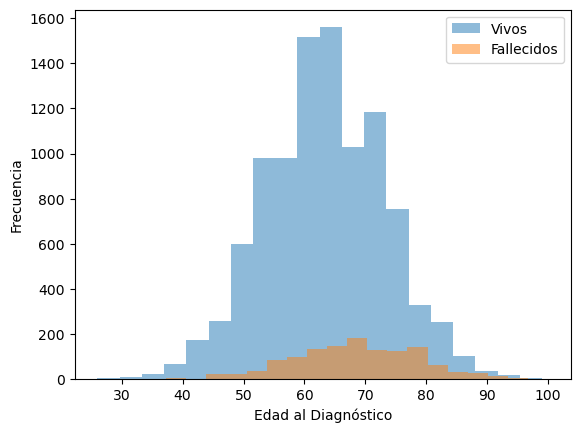

In [103]:
# Histograma de edades al diagnóstico para pacientes vivos y fallecidos
plt.hist(pacientes_vivos['Age'], bins=20, alpha=0.5, label='Vivos')
plt.hist(pacientes_fallecidos['Age'], bins=20, alpha=0.5, label='Fallecidos')
plt.xlabel('Edad al Diagnóstico')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Podemos observar, que el cáncer de mama se suele detectar en torno a los 50-75 años, aunque si bien hay casos mas jóvenes y más mayores

Vamos a realizar un pequeño análisis para observar cual es el porcentaje de fallecidas respecto a la edad a la que fueron diagnosticadas

In [104]:
porcentaje = (
    pacientes_fallecidos['Age'].value_counts(sort=False) / df['Age'].value_counts(sort=False)
) * 100

# Crear un nuevo DataFrame para mostrar los resultados
resultado = pd.DataFrame({
    'Edad del Diagnóstico': porcentaje.index,
    'Porcentaje de Fallecidos': porcentaje.values
})


# Ordenar el DataFrame por edad
resultado = resultado.sort_values(by='Porcentaje de Fallecidos', ascending=False)
resultado.reset_index(drop=True, inplace=True)
resultado

,Edad del Diagnóstico,Porcentaje de Fallecidos
0,100,100.000000
1,95,60.000000
2,92,56.250000
3,93,40.000000
4,96,33.333333
...,...,...
66,37,NaN
67,41,NaN
68,44,NaN
69,98,NaN


Observamos que a la edad de los 100 años hay un 100% de fallecidas ya que solo poseemos una paciente con esta edad

In [105]:
df[df['Age'] == 100]

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant,age_at_diagnosis
2142,29397022,1924-07-17,2010-01-29,2017-03-03,100,1.0,0.0,15.0,1.0,1.0,...,1,0.0,0.0,IIA,IIIC,1.0,1.0,0.0,1.0,85.0
